## Conclusion


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [2]:
train_cat = pd.read_csv('../datasets/train_cat.csv')
test_cat = pd.read_csv('../datasets/test_cat.csv')
#import the csvs

## Preprocessing/ Model Prep: Create our features matrix (`X`) and target vector (`y`)


we have to create features to run regression for our target variable. The features would include both numerical and categorical varaibles which are not encoded

In [3]:
features = [col for col in train_cat.columns if col != 'SalePrice']
X = train_cat[features]
y = train_cat['SalePrice']

#we do not include saleprice in the features, and then we initiate the features into X and saleprice into y

In [4]:
features = set(train_cat.columns).intersection(set(test_cat.columns))
# these are the common features between X and test_cat, we will use this to predict y


In [5]:
X = train_cat[features]
y = train_cat['SalePrice']
#we create variables for the features and target variables

In [6]:
pd.set_option('display.max_columns', None)
X
#to see w the columns consist of

,Exterior 2nd_VinylSd,Mo Sold,Exterior 2nd_CBlock,MS Zoning_RM,MS Zoning_RL,BsmtFin SF 1,Bsmt Qual_Gd,Condition 1_RRAe,Roof Matl_WdShngl,Neighborhood_Gilbert,Total Bsmt SF,PID,Foundation_PConc,Lot Shape_IR3,Neighborhood_NWAmes,Neighborhood_Somerst,Wood Deck SF,Bsmt Full Bath,Functional_Maj2,Neighborhood_Veenker,Condition 1_Norm,Bsmt Qual_Po,Alley_Pave,Bedroom AbvGr,Foundation_CBlock,Neighborhood_Timber,Roof Style_Gable,Heating QC_TA,Neighborhood_OldTown,Functional_Mod,Condition 1_Artery,Lot Shape_IR2,House Style_SFoyer,Neighborhood_Blmngtn,Fence_GdPrv,Exterior 2nd_Brk Cmn,Electrical_SBrkr,Garage Cond_TA,Overall Cond,Neighborhood_SWISU,Heating_GasA,Garage Cond_Po,Condition 2_PosA,Bsmt Exposure_Mn,Fireplaces,Exterior 2nd_Wd Shng,BsmtFin Type 1_BLQ,Functional_Typ,Fireplace Qu_Gd,Exter Cond_Ex,Fence_GdWo,3Ssn Porch,House Style_2.5Fin,MS Zoning_I (all),Neighborhood_Mitchel,Exterior 2nd_HdBoard,Neighborhood_IDOTRR,Lot Config_Corner,Foundation_Slab,Sale Type_COD,MS SubClass,Roof Matl_Tar&Grv,Fence_MnPrv,Exter Cond_TA,Condition 1_RRNe,Misc Val,Neighborhood_NPkVill,BsmtFin Type 1_Unf,Lot Config_FR3,Garage Finish_RFn,Neighborhood_NoRidge,Low Qual Fin SF,Garage Cars,Open Porch SF,Exter Qual_Gd,Exterior 2nd_AsphShn,Garage Cond_Gd,Land Slope_Mod,Misc Feature_Othr,Exterior 1st_WdShing,Garage Cond_Fa,Pool QC_Ex,Bldg Type_1Fam,Utilities_NoSewr,BsmtFin SF 2,Garage Type_2Types,Sale Type_New,Exterior 1st_CemntBd,Id,Central Air_N,Bsmt Exposure_Gd,House Style_1.5Unf,Overall Qual,Gr Liv Area,Roof Style_Gambrel,Land Contour_Low,Garage Type_CarPort,Garage Qual_Gd,Garage Qual_TA,Roof Matl_WdShake,Exter Qual_Ex,Misc Feature_Shed,Functional_Min2,Garage Area,Fireplace Qu_Fa,Garage Type_BuiltIn,Exter Qual_Fa,Bldg Type_TwnhsE,Kitchen Qual_Fa,Lot Area,Land Slope_Sev,Enclosed Porch,Foundation_Wood,Bsmt Cond_Fa,Half Bath,Screen Porch,Yr Sold,Neighborhood_MeadowV,Year Built,MS Zoning_FV,BsmtFin Type 2_ALQ,Fence_MnWw,Neighborhood_NridgHt,Garage Yr Blt,Roof Style_Shed,Heating_GasW,Heating QC_Ex,House Style_2Story,House Style_1.5Fin,Exterior 1st_Stucco,BsmtFin Type 2_GLQ,Misc Feature_Gar2,Bsmt Exposure_No,BsmtFin Type 2_Unf,Neighborhood_StoneBr,Condition 2_PosN,Paved Drive_Y,Sale Type_ConLI,Garage Type_Attchd,Street_Pave,Exterior 2nd_CmentBd,Sale Type_ConLD,Alley_Grvl,Neighborhood_BrDale,House Style_2.5Unf,MS Zoning_RH,Mas Vnr Area,Neighborhood_Edwards,Year Remod/Add,House Style_1Story,Sale Type_Oth,Condition 1_PosN,Paved Drive_P,Full Bath,Exter Cond_Fa,Bsmt Qual_Ex,Heating QC_Fa,Roof Matl_CompShg,Exterior 2nd_Wd Sdng,Bsmt Qual_Fa,Lot Frontage,Garage Qual_Fa,Exterior 1st_BrkComm,Heating QC_Gd,Roof Style_Hip,Utilities_AllPub,Exter Cond_Gd,Sale Type_ConLw,Fireplace Qu_Ex,Electrical_FuseF,Neighborhood_Blueste,Garage Type_Detchd,Exterior 1st_Plywood,Exter Qual_TA,Garage Finish_Fin,Electrical_FuseP,Land Contour_Lvl,Mas Vnr Type_Stone,Bsmt Exposure_Av,Neighborhood_ClearCr,Bsmt Cond_Gd,Neighborhood_CollgCr,Mas Vnr Type_BrkFace,Kitchen Qual_TA,Garage Finish_Unf,Street_Grvl,Bsmt Qual_TA,Fireplace Qu_TA,Sale Type_WD,Exterior 1st_VinylSd,BsmtFin Type 2_LwQ,Bldg Type_2fmCon,Kitchen AbvGr,Roof Style_Mansard,Exterior 2nd_ImStucc,Condition 1_Feedr,Kitchen Qual_Gd,Electrical_FuseA,Condition 1_PosA,Lot Config_FR2,Bsmt Half Bath,Condition 1_RRNn,Bldg Type_Duplex,TotRms AbvGrd,Land Contour_Bnk,Condition 2_Feedr,1st Flr SF,Exterior 1st_MetalSd,Exterior 2nd_Stucco,BsmtFin Type 1_LwQ,Bldg Type_Twnhs,Lot Shape_Reg,Condition 1_RRAn,Lot Config_CulDSac,Exterior 1st_BrkFace,Garage Cond_Ex,Condition 2_Norm,Roof Style_Flat,Garage Type_Basment,Bsmt Cond_TA,Sale Type_Con,Mas Vnr Type_None,Foundation_Stone,Exter Cond_Po,Pool QC_TA,Land Slope_Gtl,Foundation_BrkTil,Mas Vnr Type_BrkCmn,Exterior 1st_AsphShn,2nd Flr SF,Garage Qual_Po,Kitchen Qual_Ex,Bsmt Unf SF,Exterior 1st_Wd Sdng,BsmtFin Type 2_Rec,House Style_SLvl,Heating_Grav,Sale Type_CWD,Land Contour_HLS,Functional_Min1,Pool Area,Neighborhood_NAmes,BsmtFin Type 2_BLQ,Lot Config_Inside,Exterior 2nd_MetalSd,Neighborhood_Crawfor,Neighborhood_BrkS

## Preprocessing/ Model Prep: Train/test split


**we want to split it into training set (80%) and holdout set (20%)**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)
#split into training and test set

In [8]:
X_train

,Exterior 2nd_VinylSd,Mo Sold,Exterior 2nd_CBlock,MS Zoning_RM,MS Zoning_RL,BsmtFin SF 1,Bsmt Qual_Gd,Condition 1_RRAe,Roof Matl_WdShngl,Neighborhood_Gilbert,Total Bsmt SF,PID,Foundation_PConc,Lot Shape_IR3,Neighborhood_NWAmes,Neighborhood_Somerst,Wood Deck SF,Bsmt Full Bath,Functional_Maj2,Neighborhood_Veenker,Condition 1_Norm,Bsmt Qual_Po,Alley_Pave,Bedroom AbvGr,Foundation_CBlock,Neighborhood_Timber,Roof Style_Gable,Heating QC_TA,Neighborhood_OldTown,Functional_Mod,Condition 1_Artery,Lot Shape_IR2,House Style_SFoyer,Neighborhood_Blmngtn,Fence_GdPrv,Exterior 2nd_Brk Cmn,Electrical_SBrkr,Garage Cond_TA,Overall Cond,Neighborhood_SWISU,Heating_GasA,Garage Cond_Po,Condition 2_PosA,Bsmt Exposure_Mn,Fireplaces,Exterior 2nd_Wd Shng,BsmtFin Type 1_BLQ,Functional_Typ,Fireplace Qu_Gd,Exter Cond_Ex,Fence_GdWo,3Ssn Porch,House Style_2.5Fin,MS Zoning_I (all),Neighborhood_Mitchel,Exterior 2nd_HdBoard,Neighborhood_IDOTRR,Lot Config_Corner,Foundation_Slab,Sale Type_COD,MS SubClass,Roof Matl_Tar&Grv,Fence_MnPrv,Exter Cond_TA,Condition 1_RRNe,Misc Val,Neighborhood_NPkVill,BsmtFin Type 1_Unf,Lot Config_FR3,Garage Finish_RFn,Neighborhood_NoRidge,Low Qual Fin SF,Garage Cars,Open Porch SF,Exter Qual_Gd,Exterior 2nd_AsphShn,Garage Cond_Gd,Land Slope_Mod,Misc Feature_Othr,Exterior 1st_WdShing,Garage Cond_Fa,Pool QC_Ex,Bldg Type_1Fam,Utilities_NoSewr,BsmtFin SF 2,Garage Type_2Types,Sale Type_New,Exterior 1st_CemntBd,Id,Central Air_N,Bsmt Exposure_Gd,House Style_1.5Unf,Overall Qual,Gr Liv Area,Roof Style_Gambrel,Land Contour_Low,Garage Type_CarPort,Garage Qual_Gd,Garage Qual_TA,Roof Matl_WdShake,Exter Qual_Ex,Misc Feature_Shed,Functional_Min2,Garage Area,Fireplace Qu_Fa,Garage Type_BuiltIn,Exter Qual_Fa,Bldg Type_TwnhsE,Kitchen Qual_Fa,Lot Area,Land Slope_Sev,Enclosed Porch,Foundation_Wood,Bsmt Cond_Fa,Half Bath,Screen Porch,Yr Sold,Neighborhood_MeadowV,Year Built,MS Zoning_FV,BsmtFin Type 2_ALQ,Fence_MnWw,Neighborhood_NridgHt,Garage Yr Blt,Roof Style_Shed,Heating_GasW,Heating QC_Ex,House Style_2Story,House Style_1.5Fin,Exterior 1st_Stucco,BsmtFin Type 2_GLQ,Misc Feature_Gar2,Bsmt Exposure_No,BsmtFin Type 2_Unf,Neighborhood_StoneBr,Condition 2_PosN,Paved Drive_Y,Sale Type_ConLI,Garage Type_Attchd,Street_Pave,Exterior 2nd_CmentBd,Sale Type_ConLD,Alley_Grvl,Neighborhood_BrDale,House Style_2.5Unf,MS Zoning_RH,Mas Vnr Area,Neighborhood_Edwards,Year Remod/Add,House Style_1Story,Sale Type_Oth,Condition 1_PosN,Paved Drive_P,Full Bath,Exter Cond_Fa,Bsmt Qual_Ex,Heating QC_Fa,Roof Matl_CompShg,Exterior 2nd_Wd Sdng,Bsmt Qual_Fa,Lot Frontage,Garage Qual_Fa,Exterior 1st_BrkComm,Heating QC_Gd,Roof Style_Hip,Utilities_AllPub,Exter Cond_Gd,Sale Type_ConLw,Fireplace Qu_Ex,Electrical_FuseF,Neighborhood_Blueste,Garage Type_Detchd,Exterior 1st_Plywood,Exter Qual_TA,Garage Finish_Fin,Electrical_FuseP,Land Contour_Lvl,Mas Vnr Type_Stone,Bsmt Exposure_Av,Neighborhood_ClearCr,Bsmt Cond_Gd,Neighborhood_CollgCr,Mas Vnr Type_BrkFace,Kitchen Qual_TA,Garage Finish_Unf,Street_Grvl,Bsmt Qual_TA,Fireplace Qu_TA,Sale Type_WD,Exterior 1st_VinylSd,BsmtFin Type 2_LwQ,Bldg Type_2fmCon,Kitchen AbvGr,Roof Style_Mansard,Exterior 2nd_ImStucc,Condition 1_Feedr,Kitchen Qual_Gd,Electrical_FuseA,Condition 1_PosA,Lot Config_FR2,Bsmt Half Bath,Condition 1_RRNn,Bldg Type_Duplex,TotRms AbvGrd,Land Contour_Bnk,Condition 2_Feedr,1st Flr SF,Exterior 1st_MetalSd,Exterior 2nd_Stucco,BsmtFin Type 1_LwQ,Bldg Type_Twnhs,Lot Shape_Reg,Condition 1_RRAn,Lot Config_CulDSac,Exterior 1st_BrkFace,Garage Cond_Ex,Condition 2_Norm,Roof Style_Flat,Garage Type_Basment,Bsmt Cond_TA,Sale Type_Con,Mas Vnr Type_None,Foundation_Stone,Exter Cond_Po,Pool QC_TA,Land Slope_Gtl,Foundation_BrkTil,Mas Vnr Type_BrkCmn,Exterior 1st_AsphShn,2nd Flr SF,Garage Qual_Po,Kitchen Qual_Ex,Bsmt Unf SF,Exterior 1st_Wd Sdng,BsmtFin Type 2_Rec,House Style_SLvl,Heating_Grav,Sale Type_CWD,Land Contour_HLS,Functional_Min1,Pool Area,Neighborhood_NAmes,BsmtFin Type 2_BLQ,Lot Config_Inside,Exterior 2nd_MetalSd,Neighborhood_Crawfor,Neighborhood_BrkS

In [9]:
X_train.shape
#check the shape

(1639, 264)

In [10]:
X_columns = X_train.columns

In [11]:
test_cat


,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garag

In [12]:
test_cat2 = test_cat[X_train.columns]

In [13]:
test_cat2

,Exterior 2nd_VinylSd,Mo Sold,Exterior 2nd_CBlock,MS Zoning_RM,MS Zoning_RL,BsmtFin SF 1,Bsmt Qual_Gd,Condition 1_RRAe,Roof Matl_WdShngl,Neighborhood_Gilbert,Total Bsmt SF,PID,Foundation_PConc,Lot Shape_IR3,Neighborhood_NWAmes,Neighborhood_Somerst,Wood Deck SF,Bsmt Full Bath,Functional_Maj2,Neighborhood_Veenker,Condition 1_Norm,Bsmt Qual_Po,Alley_Pave,Bedroom AbvGr,Foundation_CBlock,Neighborhood_Timber,Roof Style_Gable,Heating QC_TA,Neighborhood_OldTown,Functional_Mod,Condition 1_Artery,Lot Shape_IR2,House Style_SFoyer,Neighborhood_Blmngtn,Fence_GdPrv,Exterior 2nd_Brk Cmn,Electrical_SBrkr,Garage Cond_TA,Overall Cond,Neighborhood_SWISU,Heating_GasA,Garage Cond_Po,Condition 2_PosA,Bsmt Exposure_Mn,Fireplaces,Exterior 2nd_Wd Shng,BsmtFin Type 1_BLQ,Functional_Typ,Fireplace Qu_Gd,Exter Cond_Ex,Fence_GdWo,3Ssn Porch,House Style_2.5Fin,MS Zoning_I (all),Neighborhood_Mitchel,Exterior 2nd_HdBoard,Neighborhood_IDOTRR,Lot Config_Corner,Foundation_Slab,Sale Type_COD,MS SubClass,Roof Matl_Tar&Grv,Fence_MnPrv,Exter Cond_TA,Condition 1_RRNe,Misc Val,Neighborhood_NPkVill,BsmtFin Type 1_Unf,Lot Config_FR3,Garage Finish_RFn,Neighborhood_NoRidge,Low Qual Fin SF,Garage Cars,Open Porch SF,Exter Qual_Gd,Exterior 2nd_AsphShn,Garage Cond_Gd,Land Slope_Mod,Misc Feature_Othr,Exterior 1st_WdShing,Garage Cond_Fa,Pool QC_Ex,Bldg Type_1Fam,Utilities_NoSewr,BsmtFin SF 2,Garage Type_2Types,Sale Type_New,Exterior 1st_CemntBd,Id,Central Air_N,Bsmt Exposure_Gd,House Style_1.5Unf,Overall Qual,Gr Liv Area,Roof Style_Gambrel,Land Contour_Low,Garage Type_CarPort,Garage Qual_Gd,Garage Qual_TA,Roof Matl_WdShake,Exter Qual_Ex,Misc Feature_Shed,Functional_Min2,Garage Area,Fireplace Qu_Fa,Garage Type_BuiltIn,Exter Qual_Fa,Bldg Type_TwnhsE,Kitchen Qual_Fa,Lot Area,Land Slope_Sev,Enclosed Porch,Foundation_Wood,Bsmt Cond_Fa,Half Bath,Screen Porch,Yr Sold,Neighborhood_MeadowV,Year Built,MS Zoning_FV,BsmtFin Type 2_ALQ,Fence_MnWw,Neighborhood_NridgHt,Garage Yr Blt,Roof Style_Shed,Heating_GasW,Heating QC_Ex,House Style_2Story,House Style_1.5Fin,Exterior 1st_Stucco,BsmtFin Type 2_GLQ,Misc Feature_Gar2,Bsmt Exposure_No,BsmtFin Type 2_Unf,Neighborhood_StoneBr,Condition 2_PosN,Paved Drive_Y,Sale Type_ConLI,Garage Type_Attchd,Street_Pave,Exterior 2nd_CmentBd,Sale Type_ConLD,Alley_Grvl,Neighborhood_BrDale,House Style_2.5Unf,MS Zoning_RH,Mas Vnr Area,Neighborhood_Edwards,Year Remod/Add,House Style_1Story,Sale Type_Oth,Condition 1_PosN,Paved Drive_P,Full Bath,Exter Cond_Fa,Bsmt Qual_Ex,Heating QC_Fa,Roof Matl_CompShg,Exterior 2nd_Wd Sdng,Bsmt Qual_Fa,Lot Frontage,Garage Qual_Fa,Exterior 1st_BrkComm,Heating QC_Gd,Roof Style_Hip,Utilities_AllPub,Exter Cond_Gd,Sale Type_ConLw,Fireplace Qu_Ex,Electrical_FuseF,Neighborhood_Blueste,Garage Type_Detchd,Exterior 1st_Plywood,Exter Qual_TA,Garage Finish_Fin,Electrical_FuseP,Land Contour_Lvl,Mas Vnr Type_Stone,Bsmt Exposure_Av,Neighborhood_ClearCr,Bsmt Cond_Gd,Neighborhood_CollgCr,Mas Vnr Type_BrkFace,Kitchen Qual_TA,Garage Finish_Unf,Street_Grvl,Bsmt Qual_TA,Fireplace Qu_TA,Sale Type_WD,Exterior 1st_VinylSd,BsmtFin Type 2_LwQ,Bldg Type_2fmCon,Kitchen AbvGr,Roof Style_Mansard,Exterior 2nd_ImStucc,Condition 1_Feedr,Kitchen Qual_Gd,Electrical_FuseA,Condition 1_PosA,Lot Config_FR2,Bsmt Half Bath,Condition 1_RRNn,Bldg Type_Duplex,TotRms AbvGrd,Land Contour_Bnk,Condition 2_Feedr,1st Flr SF,Exterior 1st_MetalSd,Exterior 2nd_Stucco,BsmtFin Type 1_LwQ,Bldg Type_Twnhs,Lot Shape_Reg,Condition 1_RRAn,Lot Config_CulDSac,Exterior 1st_BrkFace,Garage Cond_Ex,Condition 2_Norm,Roof Style_Flat,Garage Type_Basment,Bsmt Cond_TA,Sale Type_Con,Mas Vnr Type_None,Foundation_Stone,Exter Cond_Po,Pool QC_TA,Land Slope_Gtl,Foundation_BrkTil,Mas Vnr Type_BrkCmn,Exterior 1st_AsphShn,2nd Flr SF,Garage Qual_Po,Kitchen Qual_Ex,Bsmt Unf SF,Exterior 1st_Wd Sdng,BsmtFin Type 2_Rec,House Style_SLvl,Heating_Grav,Sale Type_CWD,Land Contour_HLS,Functional_Min1,Pool Area,Neighborhood_NAmes,BsmtFin Type 2_BLQ,Lot Config_Inside,Exterior 2nd_MetalSd,Neighborhood_Crawfor,Neighborhood_BrkS

## Preprocessing/ Model Prep: Scaling


since we are using Lasso and Ridge, we have to scale our features using StandardScaler to X_train and use it to transform both X-train and X-test

In [14]:

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
# we use ss and then fit the X_train
#you modified this


In [15]:
X_train

array([[ 1.38058986, -1.56803166, -0.02470831, ..., -0.12190439,
        -0.0349535 , -0.20964027],
       [-0.72432808, -1.93696704, -0.02470831, ...,  8.2031498 ,
        -0.0349535 , -0.20964027],
       [-0.72432808, -0.83016089, -0.02470831, ..., -0.12190439,
        -0.0349535 , -0.20964027],
       ...,
       [-0.72432808, -0.09229012, -0.02470831, ..., -0.12190439,
        -0.0349535 , -0.20964027],
       [-0.72432808, -0.09229012, -0.02470831, ..., -0.12190439,
        -0.0349535 , -0.20964027],
       [ 1.38058986,  1.01451603, -0.02470831, ..., -0.12190439,
        -0.0349535 , -0.20964027]])

## Modelling

- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
- Fit lasso/ridge/elastic net with default parameters.
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.


**we will be using LinearRegression, LassoCV, and RidgeCV**

In [16]:
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
enet = ElasticNetCV(l1_ratio=np.linspace(0.001, 1, 50), n_alphas = 100)
# initiatlise lasso, ridge, enet, and lr

### Cross Validation

we are using cross_val_score to evaluate all 4 learning algo

In [17]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()
#cross validaiton lr

-6.204478469446347e+24

In [18]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()
#cross validaiton lasso

0.9151518763410001

In [19]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_scores.mean()
#cross validaiton ridge

0.9079060032910101

In [20]:
enet_scores = cross_val_score(enet, X_train, y_train, cv=5)
enet_scores.mean()
#cross validaiton enet

0.9151319510459539

Lasso is doing the best, thus we move forward with this model.

we will fit the model to the training data

## Model Fitting and Evaluation

In [21]:
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)
#fit into lasso and find the score

0.9332033952722565

In [22]:
X_train

array([[ 1.38058986, -1.56803166, -0.02470831, ..., -0.12190439,
        -0.0349535 , -0.20964027],
       [-0.72432808, -1.93696704, -0.02470831, ...,  8.2031498 ,
        -0.0349535 , -0.20964027],
       [-0.72432808, -0.83016089, -0.02470831, ..., -0.12190439,
        -0.0349535 , -0.20964027],
       ...,
       [-0.72432808, -0.09229012, -0.02470831, ..., -0.12190439,
        -0.0349535 , -0.20964027],
       [-0.72432808, -0.09229012, -0.02470831, ..., -0.12190439,
        -0.0349535 , -0.20964027],
       [ 1.38058986,  1.01451603, -0.02470831, ..., -0.12190439,
        -0.0349535 , -0.20964027]])

In [23]:
lasso.score(X_test, y_test)
#check lasso score

0.9258924105325617

In [24]:
lasso_scores.mean()
#check mean lasso score

0.9151518763410001

In [25]:
pred = lasso.predict(X_test)
#predict target variable with lasso

In [26]:
r2_score(y_test, pred)
#check R2 score

0.9258924105325617

Text(0.5, 1.0, 'Predicted Sale Price vs Residuals')

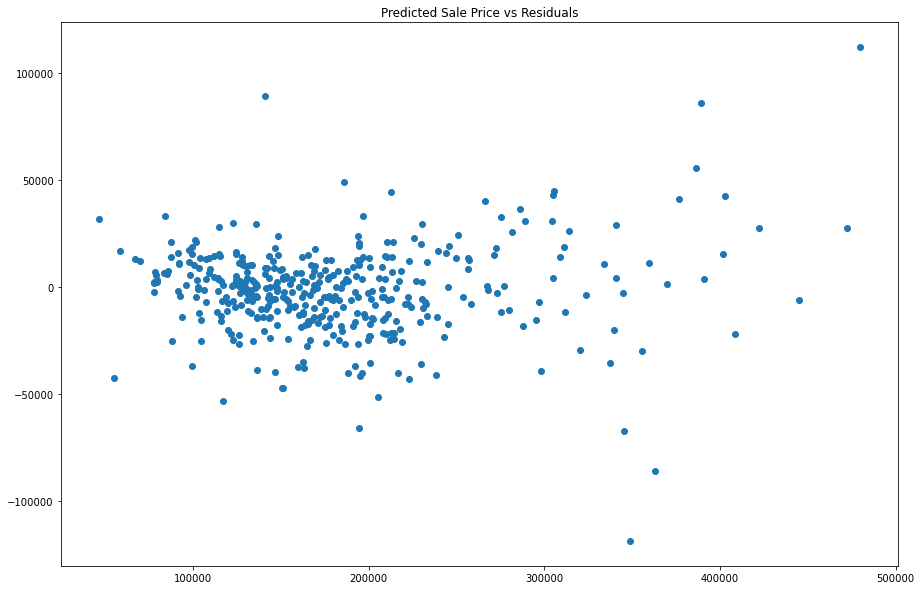

In [27]:
residuals = y_test - pred
plt.figure(figsize=(15,10))
plt.scatter(pred, residuals)
plt.title('Predicted Sale Price vs Residuals')

# look at the scatter plot of y prediction vs true y

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
mse
#find mse

442051045.6965634

In [29]:
rmse = (mse)**0.5
rmse
#find rmse

21025.010004672135

In [30]:
lasso.alpha_
#check lasso's alpha

552.5977847096145

In [31]:
lasso.alphas_

array([64229.68213107, 62038.3724607 , 59921.82321124, 57877.48379817,
       55902.89065469, 53995.66426295, 52153.50628658, 50374.19680103,
       48655.59161842, 46995.61970367, 45392.2806787 , 43843.64241192,
       42347.8386898 , 40903.06696805, 39507.58619933, 38159.71473524,
       36857.82829982, 35600.35803213, 34385.78859576, 33212.65635264,
       32079.54759934, 30985.09686343, 29927.98525799, 28906.93889228,
       27920.72733659, 26968.16213953, 26048.09539581, 25159.41836298,
       24301.06012532, 23471.98630327, 22671.19780701, 21897.7296324 ,
       21150.64969816, 20429.05772261, 19732.08413876, 19058.88904647,
       18408.66120027, 17780.61703178, 17173.99970542, 16588.07820644,
       16022.14645992, 15475.52247997, 14947.54754783, 14437.58541812,
       13945.0215521 , 13469.26237711, 13009.73457127, 12565.88437259,
       12137.17691166, 11723.0955671 , 11323.14134297, 10936.83226747,
       10563.70281211, 10203.30333077,  9855.19951775,  9518.97188451,
      

In [32]:
lasso.coef_
#check the coefficient of the lasso regression

array([ 2.24141899e+02, -0.00000000e+00, -0.00000000e+00, -4.88427555e+02,
        0.00000000e+00,  7.61353705e+03, -0.00000000e+00, -1.91571490e+02,
        2.16071905e+03, -0.00000000e+00,  7.83701848e+03,  0.00000000e+00,
        7.38172188e+02, -1.25459408e+02, -1.96540513e+02,  1.89983425e+03,
        1.12269378e+03,  1.02390031e+03, -0.00000000e+00, -0.00000000e+00,
        1.58334872e+03,  0.00000000e+00, -0.00000000e+00, -1.93477731e+03,
       -2.46137216e+02,  0.00000000e+00, -0.00000000e+00, -5.43150741e+02,
       -3.51313779e+02, -2.11284270e+02, -6.65862212e+02,  1.86300864e+02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  4.95307983e+03, -0.00000000e+00,
        4.74039587e+02, -0.00000000e+00,  4.88435395e+02, -7.28861731e+02,
        1.93765986e+03,  0.00000000e+00, -0.00000000e+00,  2.25150088e+03,
        2.91071122e+01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

## Predicting the actual test set

so basically, we have to fit the whole train_cat dataset (without SalePrice) again, and then use it to predict test_cat dataset.

what we don't have to do is to the training and test split

In [33]:
X_test = test_cat2[features]
print(X_test.shape)
print(X_train.shape)
# we need to make sure that X_test has the same columns as X_train

(879, 264)
(1639, 264)


In [34]:
X_test

,Exterior 2nd_VinylSd,Mo Sold,Exterior 2nd_CBlock,MS Zoning_RM,MS Zoning_RL,BsmtFin SF 1,Bsmt Qual_Gd,Condition 1_RRAe,Roof Matl_WdShngl,Neighborhood_Gilbert,Total Bsmt SF,PID,Foundation_PConc,Lot Shape_IR3,Neighborhood_NWAmes,Neighborhood_Somerst,Wood Deck SF,Bsmt Full Bath,Functional_Maj2,Neighborhood_Veenker,Condition 1_Norm,Bsmt Qual_Po,Alley_Pave,Bedroom AbvGr,Foundation_CBlock,Neighborhood_Timber,Roof Style_Gable,Heating QC_TA,Neighborhood_OldTown,Functional_Mod,Condition 1_Artery,Lot Shape_IR2,House Style_SFoyer,Neighborhood_Blmngtn,Fence_GdPrv,Exterior 2nd_Brk Cmn,Electrical_SBrkr,Garage Cond_TA,Overall Cond,Neighborhood_SWISU,Heating_GasA,Garage Cond_Po,Condition 2_PosA,Bsmt Exposure_Mn,Fireplaces,Exterior 2nd_Wd Shng,BsmtFin Type 1_BLQ,Functional_Typ,Fireplace Qu_Gd,Exter Cond_Ex,Fence_GdWo,3Ssn Porch,House Style_2.5Fin,MS Zoning_I (all),Neighborhood_Mitchel,Exterior 2nd_HdBoard,Neighborhood_IDOTRR,Lot Config_Corner,Foundation_Slab,Sale Type_COD,MS SubClass,Roof Matl_Tar&Grv,Fence_MnPrv,Exter Cond_TA,Condition 1_RRNe,Misc Val,Neighborhood_NPkVill,BsmtFin Type 1_Unf,Lot Config_FR3,Garage Finish_RFn,Neighborhood_NoRidge,Low Qual Fin SF,Garage Cars,Open Porch SF,Exter Qual_Gd,Exterior 2nd_AsphShn,Garage Cond_Gd,Land Slope_Mod,Misc Feature_Othr,Exterior 1st_WdShing,Garage Cond_Fa,Pool QC_Ex,Bldg Type_1Fam,Utilities_NoSewr,BsmtFin SF 2,Garage Type_2Types,Sale Type_New,Exterior 1st_CemntBd,Id,Central Air_N,Bsmt Exposure_Gd,House Style_1.5Unf,Overall Qual,Gr Liv Area,Roof Style_Gambrel,Land Contour_Low,Garage Type_CarPort,Garage Qual_Gd,Garage Qual_TA,Roof Matl_WdShake,Exter Qual_Ex,Misc Feature_Shed,Functional_Min2,Garage Area,Fireplace Qu_Fa,Garage Type_BuiltIn,Exter Qual_Fa,Bldg Type_TwnhsE,Kitchen Qual_Fa,Lot Area,Land Slope_Sev,Enclosed Porch,Foundation_Wood,Bsmt Cond_Fa,Half Bath,Screen Porch,Yr Sold,Neighborhood_MeadowV,Year Built,MS Zoning_FV,BsmtFin Type 2_ALQ,Fence_MnWw,Neighborhood_NridgHt,Garage Yr Blt,Roof Style_Shed,Heating_GasW,Heating QC_Ex,House Style_2Story,House Style_1.5Fin,Exterior 1st_Stucco,BsmtFin Type 2_GLQ,Misc Feature_Gar2,Bsmt Exposure_No,BsmtFin Type 2_Unf,Neighborhood_StoneBr,Condition 2_PosN,Paved Drive_Y,Sale Type_ConLI,Garage Type_Attchd,Street_Pave,Exterior 2nd_CmentBd,Sale Type_ConLD,Alley_Grvl,Neighborhood_BrDale,House Style_2.5Unf,MS Zoning_RH,Mas Vnr Area,Neighborhood_Edwards,Year Remod/Add,House Style_1Story,Sale Type_Oth,Condition 1_PosN,Paved Drive_P,Full Bath,Exter Cond_Fa,Bsmt Qual_Ex,Heating QC_Fa,Roof Matl_CompShg,Exterior 2nd_Wd Sdng,Bsmt Qual_Fa,Lot Frontage,Garage Qual_Fa,Exterior 1st_BrkComm,Heating QC_Gd,Roof Style_Hip,Utilities_AllPub,Exter Cond_Gd,Sale Type_ConLw,Fireplace Qu_Ex,Electrical_FuseF,Neighborhood_Blueste,Garage Type_Detchd,Exterior 1st_Plywood,Exter Qual_TA,Garage Finish_Fin,Electrical_FuseP,Land Contour_Lvl,Mas Vnr Type_Stone,Bsmt Exposure_Av,Neighborhood_ClearCr,Bsmt Cond_Gd,Neighborhood_CollgCr,Mas Vnr Type_BrkFace,Kitchen Qual_TA,Garage Finish_Unf,Street_Grvl,Bsmt Qual_TA,Fireplace Qu_TA,Sale Type_WD,Exterior 1st_VinylSd,BsmtFin Type 2_LwQ,Bldg Type_2fmCon,Kitchen AbvGr,Roof Style_Mansard,Exterior 2nd_ImStucc,Condition 1_Feedr,Kitchen Qual_Gd,Electrical_FuseA,Condition 1_PosA,Lot Config_FR2,Bsmt Half Bath,Condition 1_RRNn,Bldg Type_Duplex,TotRms AbvGrd,Land Contour_Bnk,Condition 2_Feedr,1st Flr SF,Exterior 1st_MetalSd,Exterior 2nd_Stucco,BsmtFin Type 1_LwQ,Bldg Type_Twnhs,Lot Shape_Reg,Condition 1_RRAn,Lot Config_CulDSac,Exterior 1st_BrkFace,Garage Cond_Ex,Condition 2_Norm,Roof Style_Flat,Garage Type_Basment,Bsmt Cond_TA,Sale Type_Con,Mas Vnr Type_None,Foundation_Stone,Exter Cond_Po,Pool QC_TA,Land Slope_Gtl,Foundation_BrkTil,Mas Vnr Type_BrkCmn,Exterior 1st_AsphShn,2nd Flr SF,Garage Qual_Po,Kitchen Qual_Ex,Bsmt Unf SF,Exterior 1st_Wd Sdng,BsmtFin Type 2_Rec,House Style_SLvl,Heating_Grav,Sale Type_CWD,Land Contour_HLS,Functional_Min1,Pool Area,Neighborhood_NAmes,BsmtFin Type 2_BLQ,Lot Config_Inside,Exterior 2nd_MetalSd,Neighborhood_Crawfor,Neighborhood_BrkS

In [35]:
ss = StandardScaler()
ss.fit(X_test)
X_test = ss.transform(X_test)
#fit and transform X_test

In [36]:
y_pred = lasso.predict(X_test)

y_pred
#use lasso to predict X_test's target variables

array([145845.09325335, 163286.09963889, 213133.31098367, 111954.52423186,
       177307.05821591,  93187.83664601, 110368.53078933, 152814.93689094,
       185192.99513735, 167964.46596758, 149922.62329709, 127707.81502121,
       154359.99683952, 280739.07155633, 152049.78542655, 116500.97113683,
       164872.79334159, 122647.9095642 , 193417.16660277, 174803.45647792,
       154088.31619486, 126464.64621328, 189578.64573406, 175144.51348637,
       179125.62765878, 122581.21595965, 121328.84022946, 135649.54026658,
       164055.92729775,  56761.02154923, 110604.01637907,  99565.30059814,
       200680.13691424, 159469.78083454, 209054.90219809, 187988.98326187,
       128846.41997434,  78047.05187111, 113381.20311045, 189601.67435817,
       172574.48469389, 200126.36411039, 151144.25360947, 170561.15233314,
       213475.84275023, 101697.54261452, 213145.52850647, 125364.55311274,
       134984.09764817, 125096.67260787, 113378.83371016, 200482.47399949,
       227889.84669881, 1

In [37]:
Id = test_cat['Id']
Id = Id.values
final = pd.DataFrame(data = {'Id': Id, 'SalePrice': y_pred})
final.sort_values('Id', inplace=True)
print(final)
final.to_csv('../datasets/final.csv', index = False)

#sort the values into the correct format and then export out as final.csv

       Id      SalePrice
704     2  127868.532861
706     4  287615.360093
120     6  195839.789820
312     7  230899.653334
401    17  211806.999492
..    ...            ...
537  2919   78792.294796
179  2921   87374.777303
829  2922  192694.897473
669  2925  184518.217680
675  2928  122723.358122

[879 rows x 2 columns]


## Kaggle Score

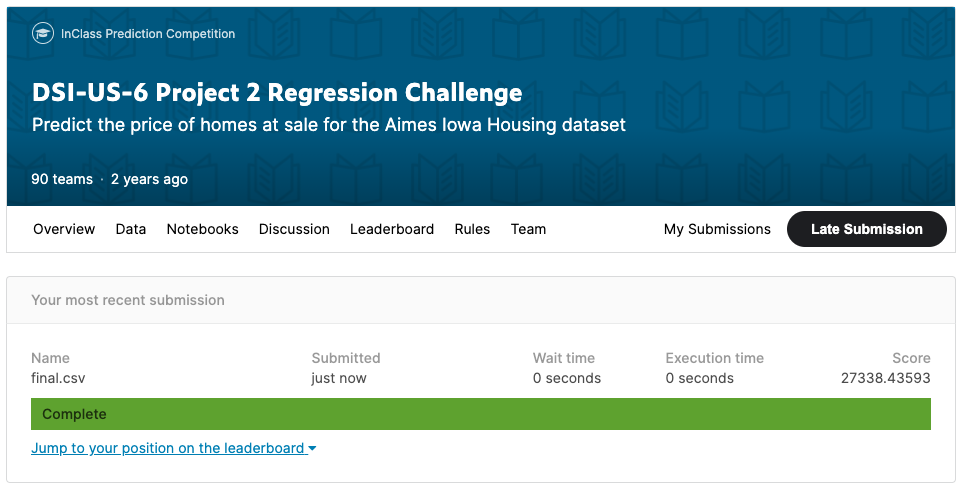

In [38]:
from IPython.display import Image
Image("../pictures/kaggle score.png")